# Risco e Retorno
Após completar este capítulo, você será capaz de:

compreender/distinguir/calcular/descrever/aplicar

- Compreender a relação entre risco e retorno
- Calcular retorno simples e relativo
- Calcular o retorno esperado
- Calcular o risco de uma carteira composta
- Compreender os conceitos de aversão ao risco e investidor racional
- Compreender o efeito da diversificação

## Introdução

As decisões financeiras são tomadas em um ambiente
de incerteza com relação ao futuro.

Parte-se do pressuposto que todo investidor tem aversão ao risco e prefere maximizar o retorno de seus investimentos.

Portanto, o retorno exigido depende do risco do investimento!

- Quanto menor o risco, menor o retorno esperado.
- Quanto maior o retorno esperado, maior o risco.

Como mensurar o risco e o retorno esperado de um investimento?

## Retorno Esperado
Representa uma média dos vários resultados esperados (valores possíveis) ponderada pela probabilidade atribuída a cada valor.

Pode ser calculado o retorno absoluto (em valor financeiro) ou o retorno relativo (em valor percentual).

**Exemplo 1**

Considere que uma ação tenha apresentado o seguite histórico de variações:

| Dia | Preço|
|-----|------|
|1 | R\\$ 10,00|
|2 | R\\$ 15,00|
|3 | R\\$  8,00|

- O retorno absoluto do dia 1 para o dia 2 foi de R\\$ 5,00.
- O retorno absoluto do período (dia 1 ao dia 3) foi de R\\$ -2,00.
- O retorno relativo do dia 1 para o dia 2 foi de 50\% (5,00 / 10,00).
- O retorno relativo do dia 1 para o dia 3 foi de -20\% (o preço caiu R\\$ 2,00 e valia originalmente R\\$ 10,00).

In [26]:
import pandas as pd
import investpy as inv


# Ler a base
# db_USD = pd.read_csv('series_dolar.csv', sep=';', decimal = ',')
db_USD = inv.currency_crosses.get_currency_cross_historical_data('USD/BRL',
                                                                 '04/01/2021',
                                                                 '07/12/2021',
                                                                 as_json=False,
                                                                 order='ascending',
                                                                 interval='Daily')
db_USD.reset_index(drop=False, inplace=True)
db_USD = db_USD.loc[:,['Date', 'Close']]

# Ajustando nome das colunas
db_USD.columns =  ['Data_base', 'Preco']

# Colocar o preço anterior numa coluna ao lado
db_USD['Preco_D-1'] = db_USD['Preco'].shift(1)
# Retorno simples financeiro (P_t - P(t-1))
db_USD['Retorno_Simples'] = db_USD['Preco'] - db_USD['Preco_D-1']
# Retorno relativo: (P_t - P_(t-1))/P_(t-1)
db_USD['Retorno_Relativo'] = db_USD['Retorno_Simples']/db_USD['Preco_D-1']
#db_USD['Retorno'] = db_USD['Preco']/db_USD['Preco'].shift(-1) - 1
db_USD

,Data_base,Preco,Preco_D-1,Retorno_Simples,Retorno_Relativo
0,2021-01-04,5.2968,NaN,NaN,NaN
1,2021-01-05,5.2854,5.2968,-0.0114,-0.002152
2,2021-01-06,5.3139,5.2854,0.0285,0.005392
3,2021-01-07,5.4101,5.3139,0.0962,0.018103
4,2021-01-08,5.4178,5.4101,0.0077,0.001423
...,...,...,...,...,...
235,2021-12-01,5.6955,5.6239,0.0716,0.012731
236,2021-12-02,5.6462,5.6955,-0.0493,-0.008656
237,2021-12-03,5.6532,5.6462,0.0070,0.001240
238,2021-12-06,5.6891,5.6532,0.0359,0.006350


In [13]:
R3 = 45.8/46-1
R4 = 48.9/45.8-1
R5 = 49.4/48.9-1

(1*(1+R3)*(1+R4)*(1+R5) - 1)*100

7.391304347826089

In [16]:
((49.4/46) - 1)*100

7.391304347826089

In [19]:
# Retorno de 20 dias

# Ler a base
# db_USD = pd.read_csv('series_dolar.csv', sep=';', decimal = ',')
db_USD_2 = inv.currency_crosses.get_currency_cross_historical_data('USD/BRL',
                                                                 '04/01/2021',
                                                                 '07/12/2021',
                                                                 as_json=False,
                                                                 order='ascending',
                                                                 interval='Daily')
db_USD_2.reset_index(drop=False, inplace=True)
db_USD_2 = db_USD_2.loc[:,['Date', 'Close']]

# Ajustando nome das colunas
db_USD_2.columns =  ['Data_base', 'Preco']

# Pego o preço de 20 dias atrás
db_USD_2['Preco_D-20'] = db_USD_2['Preco'].shift(20)
db_USD_2['Retorno_Simples'] = db_USD_2['Preco'] - db_USD_2['Preco_D-20']
db_USD_2['Retorno_Relativo'] = db_USD_2['Retorno_Simples']/db_USD_2['Preco_D-20']

# Calculando o rel relativo diretamente em uma linha, usando a outra fórmula: P_t/P_(t-1) - 1
#db_USD['Retorno'] = db_USD['Preco']/db_USD['Preco'].shift(-20) - 1
db_USD_2

,Data_base,Preco,Preco_D-20,Retorno_Simples,Retorno_Relativo
0,2021-01-04,5.2968,NaN,NaN,NaN
1,2021-01-05,5.2854,NaN,NaN,NaN
2,2021-01-06,5.3139,NaN,NaN,NaN
3,2021-01-07,5.4101,NaN,NaN,NaN
4,2021-01-08,5.4178,NaN,NaN,NaN
...,...,...,...,...,...
235,2021-12-01,5.6955,5.5525,0.1430,0.025754
236,2021-12-02,5.6462,5.6020,0.0442,0.007890
237,2021-12-03,5.6532,5.5428,0.1104,0.019918
238,2021-12-06,5.6891,5.5440,0.1451,0.026172


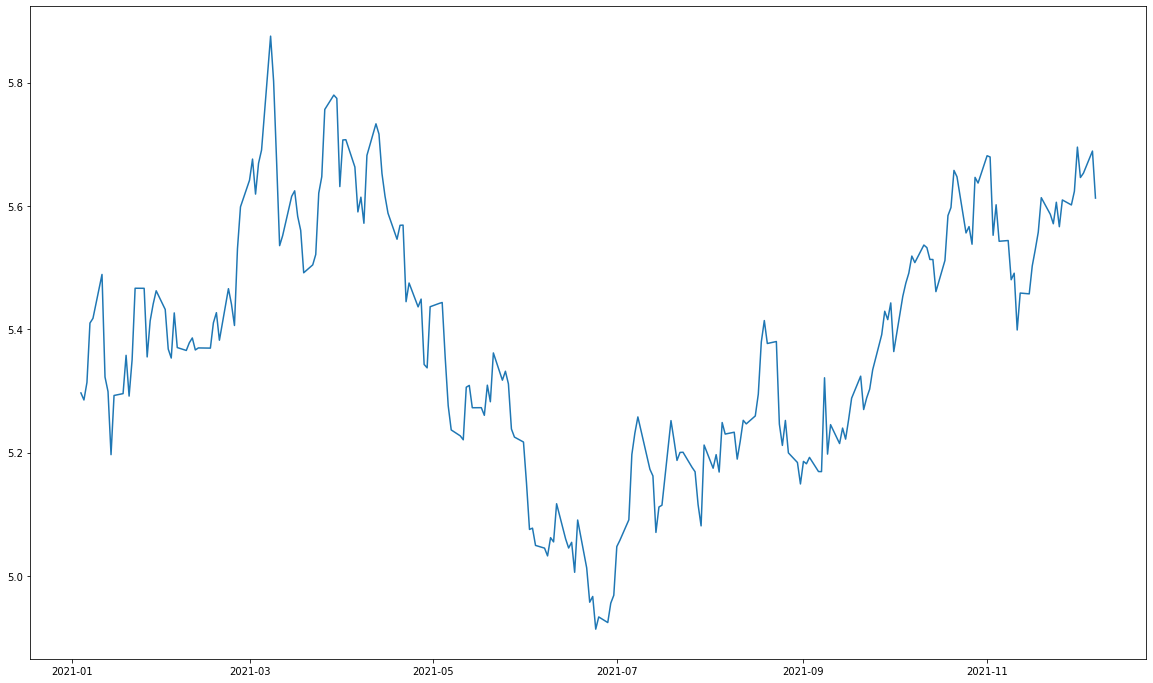

In [22]:
import matplotlib.pyplot as plt

# Gráfico da série temporal de preços
plt.figure(figsize=(20,12))
plt.plot(db_USD_2['Data_base'], db_USD['Preco'])

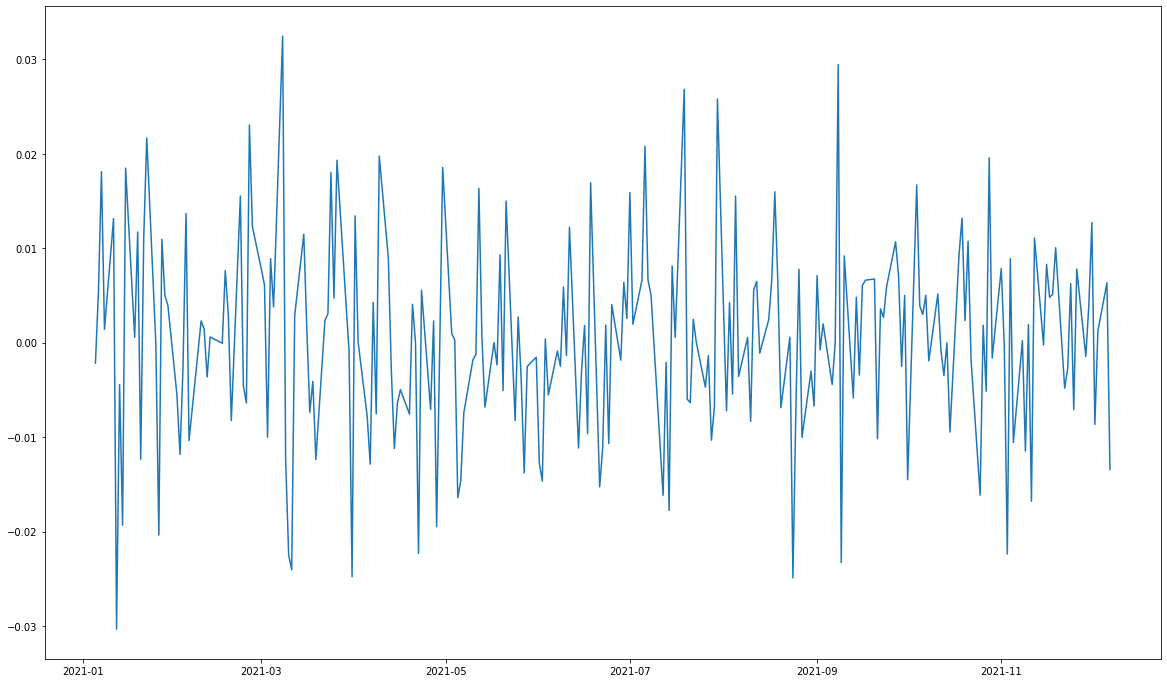

In [23]:
# Gráfico da série temporal de retornos relativos
# essa série é centrada no zero, diferente dos preços
plt.figure(figsize=(20,12))
plt.plot(db_USD_2['Data_base'], db_USD['Retorno_Relativo'])

### Definições Formais

Sejam:

- $P_t$: o preço no instante $t$;
- $R^{Abs}_t$: o retorno absoluto;
- $R^{Rel}_t$: o retorno relativo;

Podemos calcular os retornos como:

$$ R^{Abs}_t = P_t - P_{t-1} $$ 

$$ R^{Rel}_t = \frac{P_t  - P_{t-1}}{P_{t-1}} $$

Ou:

$$ R^{Rel}_t = \frac{R^{Abs}_t}{P_{t-1}} $$

Ou:

$$ R^{Rel}_t = \frac{P_t}{P_{t-1}} - 1$$

Também podemos calcular o retorno logaritmo, ou log-Retorno:

$$ r^{Rel}_t = ln\frac{P_t}{P_{t-1}}$$

In [27]:
import numpy as np

# Ler a base
# db_USD = pd.read_csv('series_dolar.csv', sep=';', decimal = ',')
# db_USD = inv.currency_crosses.get_currency_cross_historical_data('USD/BRL',
#                                                                  '04/01/2021',
#                                                                  '07/12/2021',
#                                                                  as_json=False,
#                                                                  order='ascending',
#                                                                  interval='Daily')
# db_USD.reset_index(drop=False, inplace=True)
# db_USD = db_USD.loc[:,['Date', 'Close']]

# # Ajustando nome das colunas
# db_USD.columns =  ['Data_base', 'Preco']

# Cálculo de log-retorno
# Primeiro calculo P_t/P_(t-1)
db_USD['log-Ret_1d'] = db_USD['Preco']/db_USD['Preco'].shift(1)
# Depois aplico o log no resultado acima
db_USD['log-Ret_1d'] = db_USD['log-Ret_1d'].apply(lambda x: np.log(x)) 

# Essa série também é centrada no zero e, como os retornos relativos são pequenos (centrados no zero, entre -2% e 3%), 
# o log-retorno fica bem parecido - mas não é igual!
db_USD

,Data_base,Preco,Preco_D-1,Retorno_Simples,Retorno_Relativo,log-Ret_1d
0,2021-01-04,5.2968,NaN,NaN,NaN,NaN
1,2021-01-05,5.2854,5.2968,-0.0114,-0.002152,-0.002155
2,2021-01-06,5.3139,5.2854,0.0285,0.005392,0.005378
3,2021-01-07,5.4101,5.3139,0.0962,0.018103,0.017942
4,2021-01-08,5.4178,5.4101,0.0077,0.001423,0.001422
...,...,...,...,...,...,...
235,2021-12-01,5.6955,5.6239,0.0716,0.012731,0.012651
236,2021-12-02,5.6462,5.6955,-0.0493,-0.008656,-0.008694
237,2021-12-03,5.6532,5.6462,0.0070,0.001240,0.001239
238,2021-12-06,5.6891,5.6532,0.0359,0.006350,0.006330


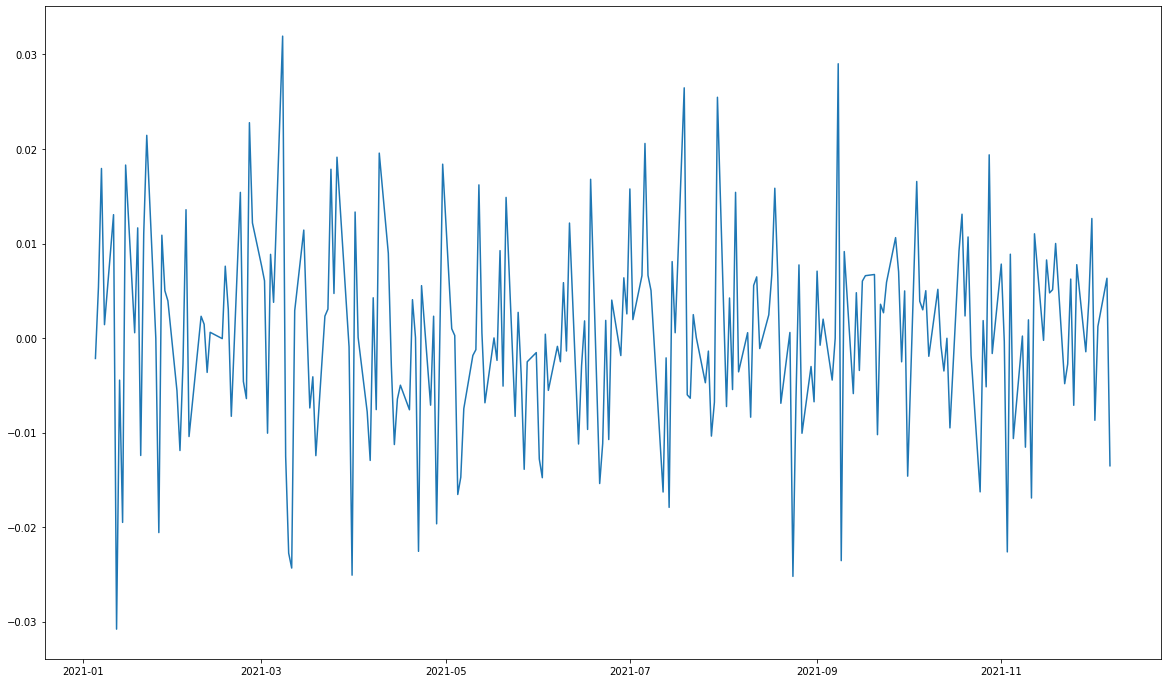

In [25]:
# Gráfico da série dos log-retornos de 1 dia
# É bem parecido com os retornos relativos, pois os valores são próximos de zero (-2% a 3%)
plt.figure(figsize=(20,12))
plt.plot(db_USD['Data_base'], db_USD['log-Ret_1d'])

In [29]:
# Dada uma série de retornos diários, como calcular o retorno acumulado de um período maior?
# Há duas formas:
# 1. Por retorno relativo simples

# Exemplo acumulando os retornos por 2 dias
P1 =  100 # Preço original
ret1 = 10/100#% # retorno do primeiro dia
ret2 = -10/100#% # retorno do segundo dia

# P2 = 110 = 100 + 10% # Preço dps de 1 dia (aplica-se o primeiro retorno)
# P3 = 110 - 11 = 99 # Preço dps de mais um dia, a partir do preço anterior P2

# A conta a ser feita é compor os retornos (semelhante a juros compostos)
P3 = P1*(1 + ret1)*(1 + ret2) 
P3

99.00000000000001

In [28]:
# 2. Por log-retornos: fica mais fácil, pois basta somar os log-retornos, com auxílio de uma transformação
# convertemos todos os retornos para log-retornos
# no fim, retiramos o log, aplicando o exp

import numpy as np
P1 =  100 # preço original
ret1 = 0.10 # Primeiro retorno simples
ret2 = -0.10 # segundo retorno simples
logret1 = np.log(110/100) # primeiro log-retorno
logret2 = np.log(99/110) # segundo log-retorno

# conta anterior por retorno simples
# P3 = P1*(1 + ret1)*(1 + ret2)
#P3

# P1 * e^(soma dos log-retornos do período)

# Conta por log-retornos:
P3 = P1*np.exp(logret1 + logret2)

# Chega no mesmo resultado
P3

99.00000000000001

In [31]:
# Retornos esperados

# Simples
media1 = db_USD['log-Ret_1d'].mean()

#log-retorno esperado
media2 = db_USD['Retorno_Relativo'].mean()

print(f'Média log-retorno: {media1*100}% e média retorno: {media2*100}%')

Média log-retorno: 0.024245539383754084% e média retorno: 0.0297099852388684%


### Observação

Muitas vezes, ao calcular retornos de preços de ações, é comum considerar os dividendos pagos em cada instante e, portanto, pode ser necessário realizar o seguinte ajuste:

$$P_t = P^{Orig}_t + D_t$$

Onde $D_t$ representa os dividendos pagos no instante $t$.


### Carteira Composta

O retorno esperado de uma **carteira composta** por mais de um ativo é definido pela média ponderada do retorno de cada ativo em relação a sua participação no total da carteira.

$$ E[R_P] = \sum_{i=1}^n R_i \cdot W_i $$

Onde:
- $R_i$ é o retorno esperado do ativo $i$
- $W_i$ é a quantidade do ativo $i$ na carteira $P$, que pode ser dada em percentual ou em valor financeiro.


**Exemplo 2**

*Suponha que você possui uma carteira com a seguinte relação de ativos:*

| Ativo | Quantidade | Retorno esperado|
|-------|------------|-----------------|
|Ação A | R\\$ 1.000,00| 25\%
|Moeda B| R\\$ 5.000,00| 10\% 
|Ação C | R\\$ 3.000,00| 15\%

*Qual é o retorno esperado da carteira?*

$$ E[R_P] = 1.000,00 \cdot 25\% + 5.000,00 \cdot 10\% +  3.000,00 \cdot 15\% $$

$$ E[R_P] = R\$ 1.200,00 $$

O retorno financeiro esperado é de R\\$1.200,00.

In [32]:
# Calcular o retorno da carteira em percentual
ret_A = 0.25
ret_B = 0.1
ret_C = 0.15

# Forma 1:
# Converter as qtdes em percentual da carteira
perc_A = 1000/9000
perc_B = 5000/9000
perc_C = 3000/9000

# Calcular pela mesma fórmula acima, mas usando os percentuais, ao invés do valor financeiro
ret_esp_P = perc_A*ret_A + perc_B*ret_B + perc_C*ret_C
ret_esp_P

0.13333333333333333

In [33]:
# Segunda forma
# Retorno financeiro da carteira para retorno relativo
# Calcula o retorno financeiro da carteira (fórmula apresentada no início)
ret_fin_P = 1200
valor_P = 9000

# Divide este retorno pelo valor da carteira total
ret_fin_P = ret_fin_P/valor_P
# Retorno percentual da carteira
ret_fin_P

0.13333333333333333

## Risco
Capacidade de se mensurar o estado de incerteza de
uma decisão mediante o conhecimento das probabilidades
de ocorrência de determinados resultados.

Todo ativo possui duas componentes de riscos:

- **Risco sistemático** (não diversificável): É inerente a todos os ativos e determinado por eventos externos à empresa e não pode ser eliminado pela diversificação.
- **Risco não sistemático** (diversificável): Identificado nas características do próprio ativo
(intrínseco) e pode ser total ou parcialmente diluído pela diversificação da carteira.

**Risco Total = Risco Sistemático + Risco Não Sistemático**

O risco é mensurado por medidas de dispersão, como desvio padrão ou variância e possui uma forte relação com o conceito de **volatilidade**.


Volatilidade representa uma variação e há inúmeras formas de mensurar ou projetar esta característica de um ativo ou um portfólio. Há três enfoques para o cálculo de volatilidades:

1. Uma maneira é equacionar um preço de mercado observado com o preço modelado de uma opção. Obtemos o que se chama **volatilidade implícita**, que usualmente é baseada na fórmula de Black-Scholes para opções européias. Essa fórmula supõe normalidade dos preços e volatilidade constante.

2. Outra maneira é modelar diretamente a volatilidade da série de retornos, usando alguma família, como a dos modelos ARCH; obtemos a chamada **volatilidade estatística**.

3. Uma alternativa é modelar a volatilidade por meio de uma média de uma função dos últimos *k* retornos, digamos. Obtemos o que se chama de **volatilidade histórica**. Podemos considerar os quadrados dos retornos ou os valores absolutos dos retornos nesta média móvel.
}
Os valores obtidos pelas diversas abordagens acima descritas podem ser muito diferentes. De qualquer modo, a volatilidade é uma medida de variabilidade de preços de ativos, e normalmente é difícil prever variações de preços.

Quando possuímos os dados históricos, é comum mensurarmos o risco utilizando o cálculo de desvio padrão da amostra disponível.


Seja:

$$ \mu = E[R] = \frac{1}{N} \sum_{t=1}^{N} R_t $$

O retorno médio do ativo. O desvio padrão de um ativo calculado a partir de uma amostra de preços ou retornos é calculado da seguinte forma:

$$ \sigma_t = \sqrt{\sum_{i=1}^n(R_t - E[R])^2} $$

Onde:
- $R_t$ é o retorno do ativo na data $t$;
- $E[R]$ é o retorno médio do ativo.

Um modelo típico para a volatilidade é da forma:

$$ R_t = \mu_t + \sigma_t \cdot \epsilon_t $$

**Exemplo 3**

Voltando aos dados do investimento no exemplo 1:

| Dia | Preço|
|-----|------|
|1 | R\\$ 10,00|
|2 | R\\$ 15,00|
|3 | R\\$  8,00|

O retorno esperado é:

$$ E[R] = (10 + 15 + 8) / 3 $$

$$ E[R] = 11,00 $$

O desvio será dado por:

$$ \sigma^2 = (10 - 11)^2 + (15 - 11)^2 + (8 - 11)^2 = 26$$

$$ \sigma = \sqrt 26 = 5,099 $$

In [36]:
p1 = 10
p2 = 15
p3 = 8

esp = (p1 + p2 + p3) / 3

sigma_quad = (p1 - esp)**2 + (p2 - esp)**2 + (p3 - esp)**2

sigma = np.sqrt(sigma_quad)
print(f'Esperança: {esp}, Variância: {sigma_quad}, Desvio padrão: {round(sigma, 2)}')

Esperança: 11.0, Variância: 26.0, Desvio padrão: 5.1


## Aversão ao Risco e Seleção Racional
As decisões de investimento em situação de incerteza deve considerar as preferências do investidor em relação ao conflito risco/retorno.

É esperado que o investidor defina como objetivo maximizar sua utilidade esperada (satisfação proporcionada pelo consumo de determinado bem). Ao comparar alternativas é possível construir escalas de preferências, representadas pelas **curvas de indiferença**.

A curva de indiferença representa a escala de preferência do investidor diante do conflito risco/retorno.

Qualquer combinação inserida sobre a curva de
indiferença é igualmente desejável.

![Curvas de aversão ao risco - investidores agressivos](Imagens/07_01_Curva_Aversao.JPG)

Representam investidores com perfil mais agressivo, que aceitam mais risco.

![Curvas de aversão ao risco - investidores conservadores](Imagens/07_02_Curva_Aversao.JPG)

Representam investidores com maior aversão ao risco, perfil mais conservador.

![Curvas de aversão ao risco - investidores sem aversão a risco](Imagens/07_03_Curva_Aversao.JPG)

À esquerda: mesmo retorno para qualquer nível de risco. À direita: mesmo risco para qualquer nível de retorno.

A **seleção racional** consiste na decisão de buscar o maior retorno esperado para o mais baixo grau de risco.

![Curvas de aversão ao risco - investidores sem aversão a risco](Imagens/07_04_Seleção_Racional.JPG)


## Diversificação
A ideia fundamental da diversificação é que o risco particular de um ativo é diferente de seu risco quando mantido em carteira. Uma grande vantagem das carteiras é que elas permitem que se reduza o risco mediante um processo de diversificação dos ativos que a compõem.

![Curvas de aversão ao risco - investidores sem aversão a risco](Imagens/07_05_Diversificação.JPG)

- Quanto maior a quantidade de ativos na carteira, menor o risco, compensando o risco não sistemático de um ativo com outros.
- A partir de certo número de ativos na carteira, o risco se mantém estável, devido à parte não diversificável (risco sistemático).

Para o cálculo do risco de um portfólio, é necessário levar em consideração não somente a participação e o risco de cada ativo individualmente, mas também como os ativos se correlacionam.


**Exemplo 4**

Se possuirmos dois ativos com correlação perfeitamente negativa, ou seja, quando o valor de um aumenta, o outro diminui na mesma magnitude, como mostrado na figura abaixo:

![Curvas de aversão ao risco - investidores sem aversão a risco](Imagens/07_06_Correl_Negativa.JPG)

Neste caso, o retorno da carteira será constante. E não havendo variação, não há risco.

Num cenário oposto, em que são compostos dois ativos com correlação fortemente positiva, ambos aumentam ou decrescem ao mesmo tempo, ampliando a magnitude dos ganhos e das perdas da carteira. 

![Curvas de aversão ao risco - investidores sem aversão a risco](Imagens/07_07_Correl_Positiva.JPG)

Neste caso, temos como resultado uma carteira com maior variação e, portanto, maior risco.


## Risco de um Portfólio
Sabendo que o risco de um portfólio com mais de um ativo deve considerar, além da variação (ou desvio padrão) de cada ativo, a correlação entre eles, podemos definir formalmente o cálculo considerando estas variáveis.

O risco de um portfólio com dois ativos pode ser mensurado de acordo com a seguinte definição:

$$ \sigma_P = \sqrt{(W_A^2 \cdot \sigma_A^2) + (W_B^2 \cdot \sigma_B^2) + 2 \cdot W_A \cdot W_b \cdot Cov_{A,B}} $$

Onde:

- $W_i$: percentual da carteira aplicado no ativo *i*;
- $\sigma^2_i$: variância dos retornos do ativo *i*;
- $COV_{A,B}$: covariância entre os ativos A e B.


A covariância pode ser calculada e função dos desvios padrão dos ativos e da correlação entre eles:

$$ COV_{A,B} = \rho_{A,B} \cdot \sigma_A \cdot \sigma_B $$

A generalização para o desvio padrão de uma carteira com *n* ativos é:

$$ \sigma_P = \sqrt{ \sum_{i=1}^{N} \sum_{j=1}^{N} W_i \cdot W_j \cdot Cov_{i,i}} $$

Ou:

$$ \sigma_P = \sqrt{ \sum_{i=1}^{N} \sum_{j=1}^{N} W_i \cdot W_j \cdot \rho_{i,j} \cdot \sigma_i \cdot \sigma_j } $$


In [46]:
import numpy as np
import seaborn as sns


curncy = ['BRL/USD', 'GBP/USD', 'CNY/USD', 'EUR/USD', 'ARS/USD']#, 'JPY/USD']
df_curncy = pd.DataFrame()

for idx, i in enumerate(curncy):
    db = inv.currency_crosses.get_currency_cross_historical_data(i,
                                                                 '01/01/2015',
                                                                 '31/12/2021',
                                                                 as_json=False,
                                                                 order='ascending',
                                                                 interval='Daily')
    db.reset_index(drop=False, inplace=True)
    db = db.loc[:,['Date', 'Close']]
    
    db.columns =  ['Data', i]
    if idx == 0:
        df_curncy = db
    else:
        df_curncy[i] = db[i]

df_curncy.set_index(['Data'], inplace=True)
# df_curncy.dropna(how='any', axis=0, inplace=True)

weights = np.ones(len(curncy))/len(curncy)

df_curncy_port = df_curncy.dot(weights)

df_curncy_port_ret = df_curncy_port.pct_change()[1:]
df_curncy = df_curncy.pct_change()[1:]

df_curncy_meanret = df_curncy.mean()
df_curncy_meanret_port = df_curncy_port_ret.mean()

df_curncy_cumret = (1 + df_curncy).cumprod()
df_curncy_port_cumret = (1 + df_curncy_port_ret).cumprod()

retorno_port = np.sum(weights * df_curncy_meanret)

df_curncy_cov = df_curncy.cov() * 252 # Este produto é devido aos retornos serem diários (Dias Úteis), então precisamos
                                      # anualizar a covariância
# sns.heatmap(df_curncy.corr(), vmin=-1, vmax=1)

portif_var = np.dot(weights.T, np.dot(df_curncy_cov, weights))
portif_risco = np.sqrt(portif_var)

print(f'Retorno portfolio: {round(retorno_port*100*np.sqrt(252), 4)}%, Risco portfolio: {round(portif_risco*100, 4)}%')

Retorno portfolio: -0.5534%, Risco portfolio: 6.6381%


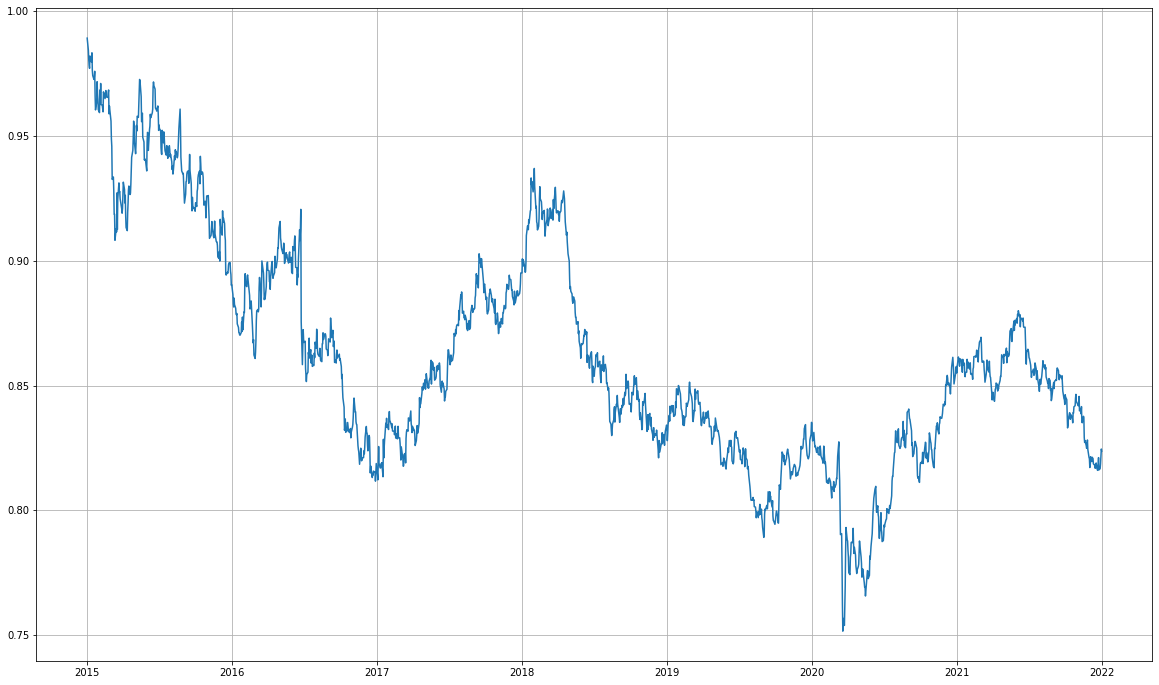

In [47]:
plt.figure(figsize=(20,12))
plt.plot(df_curncy_port_cumret);
plt.grid(visible='on')
plt.show()